In [25]:
import numpy as np
import scipy.optimize as optim
import math
import os,sys
import pandas as pd
import copy
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as stats

In [26]:
data_folder = '/Users/sns9/Research/GrowthCurves/ATP/'
os.chdir(data_folder)

ATP_offset = 1

In [27]:
def ATPfunc(x,a,b):
    return (a + b*x)
    
    #return (a + b*(x-np.log(100)))

In [28]:
#v_data = pd.read_csv('Viability_T1-ATP-fit.csv',)
v7 = pd.read_csv('ATP-T2-Study7.csv').to_numpy()[:-1,:]
v9 = pd.read_csv('ATP-T2-Study9.csv').to_numpy()[:-1,:]
print(v9[:,0])

[0.8852315 0.8021375 0.80808   0.7380395 0.7128265 0.711021 ]


In [29]:
popt, pcov = optim.curve_fit(ATPfunc,v7[:,0],v7[:,3])
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

popt_ul = copy.deepcopy(popt)
popt_ul[0] += 1*perr[0]
popt_ul[1] += 1*perr[1]
#opt_ul[2] += perr[2]

popt_ll = copy.deepcopy(popt)
popt_ll[0] -= 1*perr[0]
popt_ll[1] -= 1*perr[1]
#opt_ll[2] -= perr[2]

atp_fit = ATPfunc(v7[:,0],popt[0],popt[1])

atp_array7 = np.linspace(0.4,0.75,501)
atp7 = atp_array7
ts7 = ATPfunc(atp_array7,popt[0],popt[1])

#print(ts7)

t_ul7 = ATPfunc(atp_array7,popt_ul[0],popt_ul[1])
t_ll7 = ATPfunc(atp_array7,popt_ll[0],popt_ll[1])

err7 = np.zeros(shape=(2,ts7.shape[0]))
err7[0,:] = ts7 - t_ll7
err7[1,:] = t_ul7 - ts7

chisq, p = stats.chisquare(v7[:,3], atp_fit)
print(math.sqrt(chisq))

[ 351.10654011 -388.41596122]
[ 77.76371266 138.81708975]
5.458316940150187


In [30]:
popt, pcov = optim.curve_fit(ATPfunc,v9[:,0],v9[:,3])
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

popt_ul = copy.deepcopy(popt)
popt_ul[0] += 1*perr[0]
popt_ul[1] += 1*perr[1]
#opt_ul[2] += perr[2]

popt_ll = copy.deepcopy(popt)
popt_ll[0] -= 1*perr[0]
popt_ll[1] -= 1*perr[1]
#opt_ll[2] -= perr[2]

atp_fit = ATPfunc(v9[:,0],popt[0],popt[1])

atp_array9 = np.linspace(0.7,0.9,501)
atp9 = atp_array9
ts9 = ATPfunc(atp_array9,popt[0],popt[1])

t_ul9 = ATPfunc(atp_array9,popt_ul[0],popt_ul[1])
t_ll9 = ATPfunc(atp_array9,popt_ll[0],popt_ll[1])

chisq, p = stats.chisquare(v9[:,3], atp_fit)
print(math.sqrt(chisq))

[ 637.95699107 -646.11342815]
[104.3125267  133.95385983]
3.733929079570495


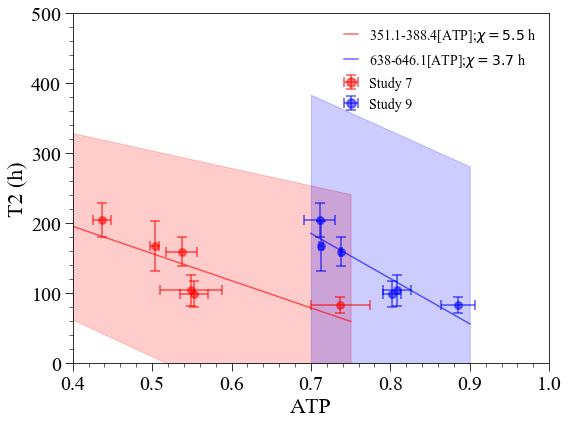

In [31]:
fig, axs = plt.subplots(figsize=(8,6))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

plt.errorbar(v7[:,0],v7[:,3],v7[:,4],v7[:,1],fmt='o',lw=2,alpha=0.5,mew=2,ms=7,color='r',capsize=5,capthick=1,label='Study 7')
#plt.errorbar(atp7,ts7,err7,fmt='o',lw=2,alpha=0.2,mew=2,ms=7,color='r',capsize=5,capthick=1,label='Study 7')
plt.plot(atp7,ts7,linewidth=1.5,color='r',alpha=0.6,label=r'351.1-388.4[ATP];$\chi = 5.5$ h')
plt.fill_between(atp7,t_ll7,t_ul7,color='r',alpha=0.2)

plt.errorbar(v9[:,0],v9[:,3],v9[:,4],v9[:,1],fmt='o',lw=2,alpha=0.5,mew=2,ms=7,color='b',capsize=5,capthick=1,label='Study 9')
plt.plot(atp9,ts9,linewidth=1.5,color='b',alpha=0.6,label=r'638-646.1[ATP];$\chi = 3.7$ h')
plt.fill_between(atp9,t_ll9,t_ul9,color='b',alpha=0.2)
#plt.plot(v24[:,0],v24[:,3],marker='o',linewidth=0,ms=8,color='c',alpha=0.7,label='24 h',mew=0)

#plt.errorbar(v48[:,0],v48[:,3],v48[:,4],v48[:,1],fmt='o',lw=2,alpha=0.7,mew=2,ms=7,color='m',capsize=5,capthick=1,label='48 h')
#plt.plot(v48[:,0],v48[:,3],marker='o',linewidth=0,ms=8,color='m',alpha=0.7,label='48 h',mew=0)

#plt.errorbar(v72[:,0],v72[:,3],v72[:,4],v72[:,1],fmt='o',lw=3,alpha=0.7,mew=2,ms=7,color='y',capsize=5,capthick=1,label='72 h')
#plt.plot(v72[:,0],v72[:,3],marker='o',linewidth=0,ms=8,color='y',alpha=0.7,label='72 h',mew=0)

plt.xticks(size=20)
plt.yticks(size=20)  
plt.xlabel(r'ATP',size=22)
plt.ylabel(r'T2 (h)',size=22,rotation=90)
plt.minorticks_on()
plt.xlim(0.4,1.0)
plt.ylim(0,500)
axs.tick_params(which='major', length=8)
axs.tick_params(which='minor', length=4)
plt.legend(frameon=False,prop={'size': 14},markerscale=1.25,handlelength=1.0)
plt.tight_layout()

plt.savefig('ATP-summary-linear.png',dpi=600)

In [8]:
xs = v_data['AODAPI'].to_numpy()
max_atp = np.max(xs)
print(xs)

NameError: name 'v_data' is not defined

In [14]:
x_data = np.zeros(shape=(n_data*xs.shape[0],))
y_data = np.zeros(shape=(n_data*xs.shape[0],))

n = 0

for k in list(v_data):
    if 'T2' in k:
        x_data[n:n+xs.shape[0]] = xs #- ATP_offset
        y_data[n:n+xs.shape[0]] = v_data[k].to_numpy()
        
        n += xs.shape[0]
        
print(x_data,y_data)

[91.04825156 90.41634933 85.12091253 78.79769836 77.35471704 65.48592972
 62.26655348 96.18375836 94.70832686 89.54151808 83.75735913 71.58916709
 68.47107004 97.0877899  91.58067542 77.32832916 61.26893939 91.72106306
 94.21362799 63.61224296 64.17491872] [ 74.93339334 122.590459   104.1071107  164.4527453  150.7650765
 193.5265527  443.6012601  102.3087309   80.82808281  85.02430243
 126.7866787  147.2682268  178.0405041   93.01710171 112.9990999
 193.4266427  212.209721    71.63636364  72.13591359 159.6570657
 190.129613  ]


In [15]:
popt, pcov = optim.curve_fit(ATPfunc,np.log(x_data),np.log(y_data))
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

popt_ul = copy.deepcopy(popt)
popt_ul[0] += 2*perr[0]
popt_ul[1] -= 2*perr[1]
#opt_ul[2] += perr[2]

popt_ll = copy.deepcopy(popt)
popt_ll[0] -= 2*perr[0]
popt_ll[1] += 2*perr[1]
#opt_ll[2] -= perr[2]

[ 4.34060711 -2.38624714]
[0.09083485 0.32891399]


In [16]:
#atp_array = np.log(np.linspace(0.2,0.8,51))#-ATP_offset)
atp_array = np.log(np.linspace(60,100,51))#-ATP_offset)
ts = math.exp(1)**ATPfunc(atp_array,popt[0],popt[1])

t_ul = math.exp(1)**ATPfunc(atp_array,popt_ul[0],popt_ul[1])
t_ll = math.exp(1)**ATPfunc(atp_array,popt_ll[0],popt_ll[1])

#atp_array = np.log(np.linspace(90,100,41))

total_data = np.zeros(shape=(ts.shape[0],4))
total_data[:,0] = math.exp(1)**atp_array #+ ATP_offset
total_data[:,1] = ts
total_data[:,2] = t_ul - ts
total_data[:,3] = ts - t_ll

cols = ['x','y','+','-']
solved_data = pd.DataFrame(total_data,columns=cols)
solved_data.to_csv('pairedAODAPIT2_fit-24-g.csv',index=None)
#solved_data.to_csv('paired-AODAPI_fit-24-g.csv',index=None)

#np.savetxt('viability_fit-60.csv',total_data,delimiter=',')